# Growth area Simulation
Strategy:
- Extracting the architecture of plants
- Sequence stack per plant and module
  - 1 Main axis (order 0)
  - Priority Find the right strategy for the appearance of modules
  - List of phythomers sorted in order of appearance
- Browse the list of sorted phythomere and assign them time start and time end

In [1]:
from openalea.mtg.algo import orders
import openalea.plantgl.all as pgl

from openalea.strawberry.import_mtgfile import import_mtgfile
import openalea.strawberry.simulation as sim

%gui qt

## Plant architecture

* import file from MTG

In [30]:
g= import_mtgfile(filename="Cir107")
g.properties()['order'] = orders(g)

In [31]:
def plantids(g):
    """ Extraction of vertex ids at plant scale

    Parameters
    ----------
    g : MTG
        An MTG

    Returns
    -------
    List
        List of vertex id at plant scale
    """
    return g.vertices(scale=1)

def modules(g):
    """List of sequence of phytomer by modules

    Parameters
    ----------
    g : MTG
        An MTG

    Returns
    -------
    List
        Return a list of phytomer id by modules/axis
    """
    plte_ids= plantids(g)
    
    modules_id=[v for v in g.vertices_iter(scale=2) 
                if (g.complex(v) in plte_ids)
                and g.label(next(g.component_roots_iter(v))) in ['F']]
    
    modules=[g.components(m) for m in modules_id]
    return modules

def dict_module_seq_plant_order(g):
    """ Dictionnary of phytomers sequences by plant ids, orders (ranks) and modules

    Parameters
    ----------
    g : MTG
        An MTG

    Returns
    -------
    dict 
        dict of dict of phytomer sequences by plant, orders and modules
    """
    
    lod= [{g.complex_at_scale(seq[0],scale=1):{g.property('order')[seq[0]]:seq}} for seq in modules(g)] # lod list of dicts of dict with plantid, orders as keys 
    
    # concat dict of dict on one dict of sequence with common keys (plantid and order)
    new_dict=dict([(k,{}) for k in plantids(g)])
    
    for l in lod:
        pid=list(l.keys())[0]
        rank=list(l[pid].keys())[0]
        
        if rank in new_dict[pid].keys():
            new_dict[pid][rank].append(l[pid][rank])
        else:
            new_dict[pid][rank]=[l[pid][rank]]
    
    return new_dict



In [117]:
dict_seq_plant_order=dict_module_seq_plant_order(g)
dict_seq_plant_order

    

{1: {0: [[3, 6, 19, 22, 29, 34, 40, 46, 52, 60, 70]]},
 71: {0: [[73, 76, 95, 98, 101, 107, 123, 129, 135, 141, 149, 163]],
  1: [[78, 81, 86, 94]]},
 164: {0: [[166, 180, 193, 196, 204, 211, 218, 224, 234, 244]],
  1: [[168, 169, 172, 173, 179]]},
 245: {0: [[247, 256, 259, 262, 265, 280, 293, 314, 321, 328, 334, 340, 354]]},
 355: {0: [[357, 366, 369, 370, 373, 376, 390, 396, 402, 408, 418, 425, 436]]},
 437: {0: [[439,
    442,
    445,
    448,
    465,
    468,
    471,
    491,
    503,
    511,
    517,
    527,
    535,
    541,
    547]],
  1: [[450, 453, 456, 459, 464]]},
 548: {0: [[550, 553, 556, 567, 584, 596, 602, 608, 614, 620, 626, 633, 641]],
  1: [[569, 572, 575, 578, 583]]},
 642: {0: [[644, 676, 679, 682, 685, 696, 703, 710, 716, 722, 733, 748]],
  1: [[646, 651, 656, 661, 664, 670, 675]]},
 749: {0: [[751, 754, 757, 760, 767, 773, 778, 785, 794, 800, 806, 811]]},
 812: {0: [[814, 817, 820, 838, 852, 869, 886, 906, 921, 936, 943, 954, 965]],
  1: [[822, 825, 828, 83

## Piles (sorte of list)

### <u>order law's:</u>

* Plant architecture order rank is dependant of time ==> order max depend of the time
* order 0 is always present
* order 1 don't appear before order 0 and after order 2 along an apparent axis. But order 2 of one apparent axis can be appear before an order 1 of an other apparent axis. 
* Priority of the uppermost branching (extension crown) compare to another module of the same order






In [106]:
dict_seq_plant_order



{1: {0: [[3, 6, 19, 22, 29, 34, 40, 46, 52, 60, 70]]},
 71: {0: [[73, 76, 95, 98, 101, 107, 123, 129, 135, 141, 149, 163]],
  1: [[78, 81, 86, 94]]},
 164: {0: [[166, 180, 193, 196, 204, 211, 218, 224, 234, 244]],
  1: [[168, 169, 172, 173, 179]]},
 245: {0: [[247, 256, 259, 262, 265, 280, 293, 314, 321, 328, 334, 340, 354]]},
 355: {0: [[357, 366, 369, 370, 373, 376, 390, 396, 402, 408, 418, 425, 436]]},
 437: {0: [[439,
    442,
    445,
    448,
    465,
    468,
    471,
    491,
    503,
    511,
    517,
    527,
    535,
    541,
    547]],
  1: [[450, 453, 456, 459, 464]]},
 548: {0: [[550, 553, 556, 567, 584, 596, 602, 608, 614, 620, 626, 633, 641]],
  1: [[569, 572, 575, 578, 583]]},
 642: {0: [[644, 676, 679, 682, 685, 696, 703, 710, 716, 722, 733, 748]],
  1: [[646, 651, 656, 661, 664, 670, 675]]},
 749: {0: [[751, 754, 757, 760, 767, 773, 778, 785, 794, 800, 806, 811]]},
 812: {0: [[814, 817, 820, 838, 852, 869, 886, 906, 921, 936, 943, 954, 965]],
  1: [[822, 825, 828, 83

In [34]:
from openalea.strawberry import visu2d as visu2d
from openalea.strawberry import analysis as analysis
from oawidgets.plantgl import PlantGL

In [36]:
df=analysis.extract_at_plant_scale(g)
df_central_ind=analysis.median_individuals(df)

pids = list(df_central_ind.vid)
n = len(pids)

scene= visu2d.plot2d(g, pids, dist=[5]*n, display=False)
PlantGL(scene, group_by_color=False)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera_animation=[], camer…

In [75]:
df_node=analysis.extract_at_node_scale(g)


,node_id,rank,branching_type,complete,nb_modules_branching,nb_branch_crown_branching,nb_extension_crown_branching,branching_length,stage,Genotype,order,date,plant
0,3,1,1,other,0,0,0,0,None,Cir107,0,2014/12/10,1
1,6,2,5,other,0,0,0,0,None,Cir107,0,2014/12/10,1
2,19,3,1,other,0,0,0,0,None,Cir107,0,2014/12/10,1
3,22,4,5,other,0,0,0,0,None,Cir107,0,2014/12/10,1
4,29,5,2,other,0,0,0,0,None,Cir107,0,2014/12/10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,7533,10,6,complete,0,0,0,0,None,Cir107,0,2015/05/20,9
763,7535,11,5,other,0,0,0,0,None,Cir107,1,2015/05/20,9
764,7545,12,6,complete,0,0,0,0,None,Cir107,1,2015/05/20,9
765,7547,13,2,other,0,0,0,0,None,Cir107,2,2015/05/20,9


In [77]:
df_node_median= df_node.groupby(["date",'rank']).mean()
df_node_median=df_node_median.reset_index()


date
2014/12/10    AxesSubplot(0.125,0.125;0.775x0.755)
2015/01/08    AxesSubplot(0.125,0.125;0.775x0.755)
2015/02/11    AxesSubplot(0.125,0.125;0.775x0.755)
2015/03/04    AxesSubplot(0.125,0.125;0.775x0.755)
2015/04/02    AxesSubplot(0.125,0.125;0.775x0.755)
2015/05/20    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

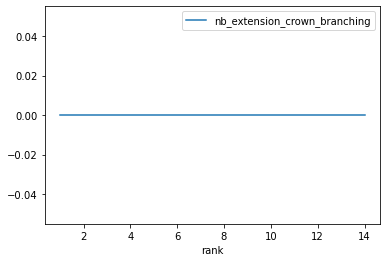

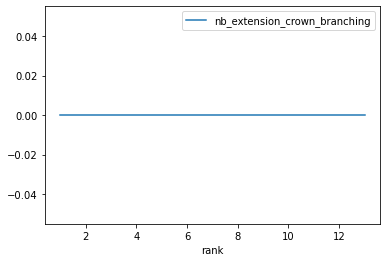

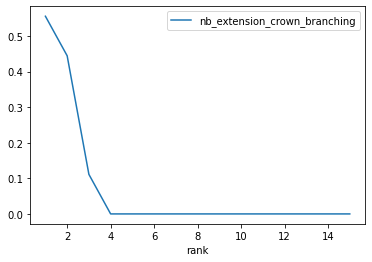

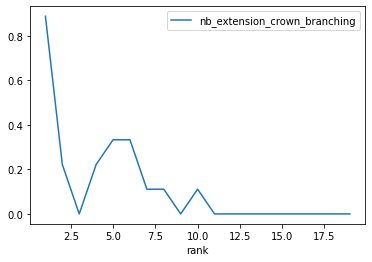

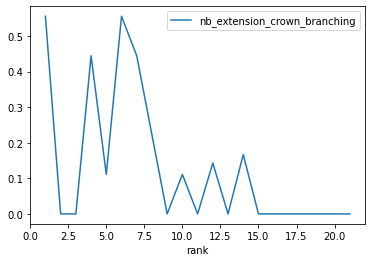

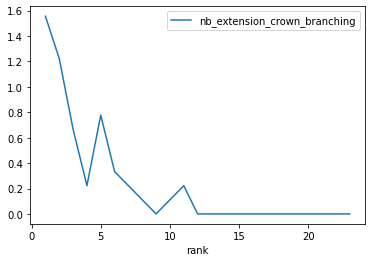

In [80]:
df_node_median.groupby("date").plot(x='rank',y='nb_extension_crown_branching')